In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from exp.config import EXP_PATH
sns.set_theme(style="whitegrid")

In [41]:
dataset = "HHAR"
full_df = []
for perc_u in [25, 50, 75, 100]:
    df = []
    perc_list = []
    results_dir = os.path.join(EXP_PATH, dataset, str(perc_u))
    for dir in os.listdir(results_dir):
        try:
            if os.path.isdir(os.path.join(results_dir, dir)):
                df.append(pd.read_csv(os.path.join(results_dir, dir, "progress.csv")))
                perc_list.append(dir.split("_")[5].split("=")[1])
        except:
            continue
    df = pd.concat(df)
    df["perc"] = perc_list
    df["perc_users"] = perc_u
    full_df.append(df)
full_df = (
    pd.concat(full_df).sort_values(by=["perc_users", "perc"]).reset_index(drop=True)
)
full_df = full_df[
    [
        "perc_users",
        "perc",
        "full_train_score",
        "full_eval_score",
        "full_test_score",
        "rand_train_score",
        "rand_eval_score",
        "rand_test_score",
        "imp_train_score",
        "imp_eval_score",
        "imp_test_score",
        "perc_chosen",
    ]
]

# multiply scores and perc_chosen by 100
full_df[
    [
        "full_train_score",
        "full_eval_score",
        "full_test_score",
        "rand_train_score",
        "rand_eval_score",
        "rand_test_score",
        "imp_train_score",
        "imp_eval_score",
        "imp_test_score",
        "perc_chosen",
    ]
] *= 100

/tmp/ipykernel_3333746/2583790739.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([str(i/100) for i in range(10, 99, 10)])
/tmp/ipykernel_3333746/2583790739.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([str(i/100) for i in range(10, 99, 10)])


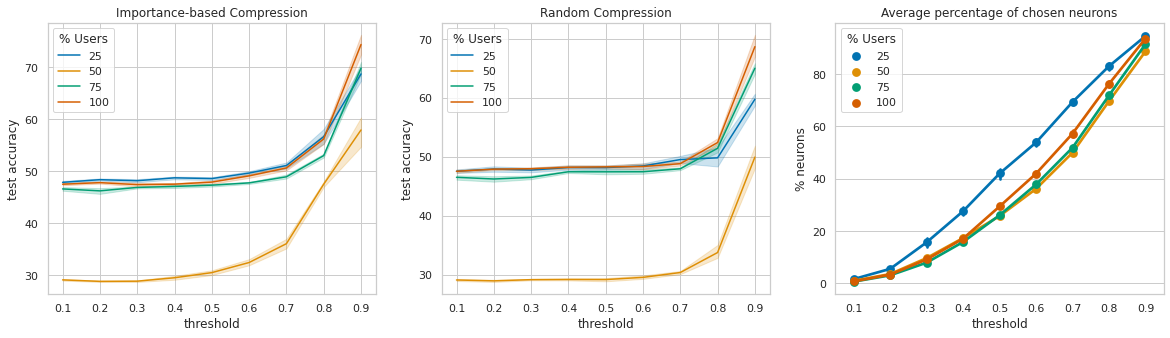

In [42]:
# three plots in a row
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ax = sns.lineplot(data=full_df, x='perc', y='imp_test_score', hue='perc_users', palette='colorblind', ax=axes[0])
ax.set(xlabel='threshold', ylabel='test accuracy', title=f'Importance-based Compression')
ax.xaxis.set_ticklabels([str(i/100) for i in range(10, 99, 10)])

ax = sns.lineplot(data=full_df, x='perc', y='rand_test_score', hue='perc_users', palette='colorblind', ax=axes[1])
ax.set(xlabel='threshold', ylabel='test accuracy', title=f'Random Compression')
ax.xaxis.set_ticklabels([str(i/100) for i in range(10, 99, 10)])

ax = sns.pointplot(data=full_df, x='perc', y='perc_chosen', hue='perc_users', palette='colorblind', ax=axes[2])
ax.set(xlabel='threshold', ylabel='% neurons', title=f'Average percentage of chosen neurons')
ax.xaxis.set_ticklabels([str(i/100) for i in range(10, 99, 10)])

axes[0].legend(title='% Users')
axes[1].legend(title='% Users')
axes[2].legend(title='% Users')
plt.savefig(f'plots/compr_{dataset}.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:

mean_df = full_df[
    [   
        "perc_users",
        "perc",
        "full_train_score",
        "full_eval_score",
        "full_test_score",
        "rand_train_score",
        "rand_eval_score",
        "rand_test_score",
        "imp_train_score",
        "imp_eval_score",
        "imp_test_score",
        "perc_chosen"
    ]
].groupby(["perc_users", "perc"]).mean().reset_index()

std_df = full_df[
    [
        "perc_users",
        "perc",
        "full_train_score",
        "full_eval_score",
        "full_test_score",
        "rand_train_score",
        "rand_eval_score",
        "rand_test_score",
        "imp_train_score",
        "imp_eval_score",
        "imp_test_score",
        "perc_chosen"
    ]
].groupby(["perc_users", "perc"]).std().reset_index()

In [34]:
full_res_df = full_df[["perc_users", "full_test_score"]]
full_res_df.groupby("perc_users").mean().reset_index()

,perc_users,full_test_score
0,25,72.958734
1,50,76.311870
2,75,84.955412
3,100,83.533328


In [35]:
full_res_df.groupby("perc_users").std().reset_index()

,perc_users,full_test_score
0,25,4.666570
1,50,13.086621
2,75,0.374306
3,100,0.388625


In [39]:
curr_perc = 100
curr_mean = mean_df[mean_df["perc_users"] == curr_perc]
curr_std = std_df[std_df["perc_users"] == curr_perc]

curr_merged = pd.merge(curr_mean, curr_std, on="perc", suffixes=("_mean", "_std"))
curr_merged[[
    "perc",
    "imp_eval_score_mean",
    "imp_test_score_mean",
    "imp_test_score_std",
    "rand_eval_score_mean",
    "rand_test_score_mean",
    "rand_test_score_std",
    "perc_chosen_mean",
    "perc_chosen_std",
]]


,perc,imp_eval_score_mean,imp_test_score_mean,imp_test_score_std,rand_eval_score_mean,rand_test_score_mean,rand_test_score_std,perc_chosen_mean,perc_chosen_std
0,0.1000,36.412761,47.484294,0.363934,36.562729,47.524563,0.443894,0.776000,0.303725
1,0.2000,36.632063,47.790871,0.349616,37.432031,47.889160,0.235335,3.372000,0.717477
2,0.3000,36.146824,47.405032,0.612276,38.614348,47.960066,0.384179,9.166000,0.848531
3,0.4000,35.787332,47.494261,0.358270,39.097428,48.207717,0.496033,17.120000,1.852854
4,0.5000,37.483079,47.893657,0.546876,40.299650,48.279227,0.425504,29.408000,0.892696
5,0.6000,39.601936,49.093153,0.656242,40.748888,48.336308,0.819153,41.936001,1.851098
6,0.7000,41.468317,50.619026,0.795582,42.028443,48.819663,0.554253,57.228001,2.237938
7,0.8000,46.150348,56.203354,1.577130,45.823904,52.401576,1.159722,76.225998,1.923748
8,0.9000,62.132126,74.394763,3.051325,57.538030,68.665770,3.219872,93.534002,1.760934


In [34]:
print(curr_merged[["full_test_score_mean", "full_test_score_std"]].mean(),
      curr_merged[["full_test_score_mean", "full_test_score_std"]].std()
)

full_test_score_mean    83.480964
full_test_score_std      0.384174
dtype: float64 full_test_score_mean    0.157016
full_test_score_std     0.085943
dtype: float64


In [30]:
curr_std = std_df[std_df["perc_users"] == 100]
curr_std[["perc_users", "perc", "full_test_score", "imp_test_score", "rand_test_score", "perc_chosen"]]

,perc_users,perc,full_test_score,imp_test_score,rand_test_score,perc_chosen
27,100,0.1000,0.319106,5.485583,7.153943,0.376557
28,100,0.2000,0.290034,7.715825,2.619485,0.596791
29,100,0.3000,0.309526,11.916218,4.703545,1.072650
30,100,0.4000,0.400891,8.083910,10.572321,1.965282
31,100,0.5000,0.419132,9.060758,11.768459,1.236475
32,100,0.6000,0.511002,10.927789,8.841402,1.692935
33,100,0.7000,0.323289,6.322977,11.193844,2.505019
34,100,0.8000,0.520941,3.784599,6.540096,2.454278
35,100,0.9000,0.363642,2.235903,2.340525,1.056661
